In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import conf as conf
import matplotlib.pyplot as plt

CARGANDO CONFIGURACION GENERAL PARA PLOTS


In [2]:
conf.general()  # cargando configuración para plots

### Sistema Schrodinger-Poisson (Schrodinger-Newton)

\begin{align}
i\hbar \frac{\partial \Psi}{\partial t}&=-\frac{\hbar^2}{2m}\triangle\Psi + V\Psi + m U\Psi,\\
\triangle U &= 4\pi G m|\Psi|^2,
\end{align}
donde $\Psi$ representa un campo escalar con dependencia temporal y espacial, el operador $\triangle$ representa al operador Laplaciano, y $U$ es el potencial gravitatorio. El potencial $V$ representa las autointeracciones que las tomaremos como nulas ($V=0$).

`Pregunta:`
- ¿Por qué una dependencia espacial y temporal en el campo? 

El sistema anterior se puede escribir en una sola ecuación integro-diferencial
\begin{equation}
i\hbar \frac{\partial \Psi}{\partial t} = \hat{H}_{0}\Psi,
\end{equation}
con $\hat{H}_{0}$ un operador integro-diferencial:
\begin{equation}
\hat{H}_{0} = \bigg[-\frac{\hbar^2}{2m}\triangle + V  -  m^2 G \int\frac{|\Psi(t, \vec{y})|^2}{|\vec{x}-\vec{y}|}d^3\vec{y} \bigg],
\end{equation}
donde se asumió condiciones homogeneas de Dirichlet.

Asociado al sistema SP (con $V=0$), tendremos el funcional de energía 
\begin{align}
\mathcal{E}[u] = \frac{\hbar^2}{2m}\int |\nabla u_j(\vec{x})|^2 d^3 x-\frac{Gm^2}{2} \int\int\frac{|u(\vec{x})|^2 |u(\vec{y})|^2}{|\vec{x}-\vec{y}|} d^3x d^3y,
\end{align}
el cual es conservado en el tiempo para cualquier solución $\Psi$ del sistema SP, es decir $\mathcal{E}[\Psi(t,\cdot)]$ es independiente de $t$.

`Ejercicio:`
- Probar que de la variación de $\mathcal{E}[u]$ se obtiene el sistema SP.

## Implementación numérica

A continuación procederemos a resolver numéricamente el sistema SP.

`Pregunta:`
- ¿Creen que se puede resolver con las unidades explícitas?

Valor de las consntantes:
$$
\bar h = 1.054571817\times 10^{-34} J\cdot s, \quad G = 6.67430 \times 10^{−11} N\cdot m^2\cdot kg^{-2}.
$$

##### Adimensionalización
A continuación procedemos a adimensionalizar el sistema, para ello introducimos los cambios de variables:
\begin{align}
\bar{t}:=\frac{2m}{\Lambda} t, \quad \vec{x}:=\frac{2m}{\Lambda^{1/2}\hbar^{1/2}}\vec{x}, \quad \bar{U}:=\frac{\Lambda}{2\hbar}U, \quad \bar{\Psi}:=\left(\frac{\pi G\Lambda^2}{2m}\right)^{1/2}\Psi,
\end{align}
donde las cantidades con barras indican que son adimensionales y $\Lambda$ es un factor de escala adimensional definido positivo (`volveremos a su importancia más adelante`).

En terminos de estas variables se llega al sistema:
\begin{align}
i\frac{\partial \Psi}{\partial t}&=-\triangle\Psi + U\Psi,\\
\triangle U &= |\Psi|^2,
\end{align}
donde se omitieron las barras.`Comentario` notar que el factor $1/2$ de la primera ecuación se absorvió, esto no es necesario de manera general.

De igual manera tendremos que el funcional de energía se escribiría como:
\begin{align}
\mathcal{E}[u] = \frac{\hbar^{5/2}}{G m\pi\Lambda^{3/2}}\mathcal{\bar E}[u],
\end{align}
donde
\begin{align}
\mathcal{\bar{E}}[u]:= T[u]-D[n,n],
\end{align}
con
\begin{align}
T[u]:=\frac{1}{2}\int |\nabla u_j(\vec{x})|^2 d^3 x, \quad D[n, n]:=\frac{1}{16\pi} \int\int\frac{n(\vec{x}) n(\vec{y})}{|\vec{x}-\vec{y}|} d^3x d^3y,
\end{align}
con $n=|u|^2$.

`Ejercicio:`
- Probar que todo lo anterior.

#### Estados estacionarios

A continuación procederemos a obtener los estados estacionarios, para ello introducimos el Ansatz para el campo escalar:
$$
\Psi(t, \vec{x})=\sigma(r)e^{-i E t}
$$
donde $\sigma(r)$ es una función real que depende de la variable radial $r$, $E$ es una constante real. Introduciendo el Ansatz en la ecuación adimensional de SP, llegamos a 
$$
\hat{H}[\sigma] \sigma(r) =E \sigma(r).
$$
Nótese que arribamos a un problema (no lineal) de autovalores, donde la constante $E$ es la autovalor de la energía asociado al perfil radial $\sigma(r)$.

Sin embargo, para la resolución numérica la mejor opción no es trabajar con la formulación integro-diferencial anterior, sinó con
\begin{align}
\triangle\sigma& = (U-E)\sigma,\\
\triangle U &= \sigma^2,
\end{align}
donde evaluamos el Ansatz armónico y acomodamos los términos. 


Para resolver el sistema anterior necesitamos identificar las condiciones de fronteras adecuadas, en este caso, las mismas se pueden obtener expandiendo el sistema en series de Taylor en $r=0$ llegándose a que: (recordar que $\triangle=\frac{d^2}{dr^2}+\frac{2}{r}\frac{d}{dr}$)
$$
\sigma(r=0)=\sigma_0,\quad \frac{d\sigma}{dr}\bigg|_{r=0}=0, \quad U(r=0)=U_0,\quad \frac{dU}{dr}\bigg|_{r=0}=0.
$$

La solución en serie hasta orden $5$ es:
\begin{align}
\sigma(r)\approx \sigma_0+\frac{r^2}{6}(U_0-E)\sigma_0 + \frac{r^4}{120}(E^2-2 E U_0 + U_0^2 +\sigma_0^2)\sigma_0+\mathcal{O}(r^6).
\end{align}


Por último, como queremos objetos localizados necesitamos en el infinito que los campos se anulen, es decir:
$$\lim\limits_{r\to\infty}\sigma(r)=0, \quad \lim\limits_{r\to\infty}U(r)=0 $$


`Pregunta:` ¿Cómo resolverían el sistema?

Si notan, tendremos tres parámetros libres: los valores en el origen $U_0, \sigma_0$ y el autovalor de la energía $E$.

- Primera posibilidad: los valores para $U_0, \sigma_0, E$ son escogido de tal forma que la condición en el infinito se cumpla (en la práctica es un $r$ lo suficientemente alejado). Es decir, podemos fijar las amplitudes centrales $U_0, \sigma_0$ y encontrar la $E$ correspondiente. Posible, sí, practico, NO, la razón es que no necesariamente encontrarás una $E$ para $U_0, \sigma_0$ fijos.

`¿Ideas?`

Introduzcamos un cambio de variable 

$$u(r) = E-U(r)$$

donde $u$ es el nuevo potencial desplazado. Notar que lo que hicimos fue definir el potencial referencial diferente.

El sistema se reduce a 
\begin{align}
\triangle\sigma& = - u \sigma,\\
\triangle u &= -\sigma^2,
\end{align}

y las condiciones de frontera 

$$
\sigma(r=0)=\sigma_0,\quad \frac{d\sigma}{dr}\bigg|_{r=0}=0, \quad u(r=0)=u_0=1,\quad \frac{du}{dr}\bigg|_{r=0}=0.
$$
Es importante señalar que ahora tendremos que $\lim\limits_{r\to\infty}u(r)=E$. También nótese como fijamos $u_0=1$. ¿Por qué creen que lo podemos hacer?


`Escalamiento:` Recuerdan la constante $\Lambda$, pues gracias a que esta escala todas las cantidades, podemos construir una configuración (por ejemplo la correspondiente a $u_0=1$) y a partir de esta, dándole valores a $\Lambda$ obtener cualquier otra deseada. 

**Comentarios**
- Sino quisieramos usar la libertad de escalamiento, lo que tendríamos que hacer es variar el $u_0$ y encontrar el $\sigma_0$ correspondiente.
- Tenemos dos opciones, podemos fijar el $u_0$ y encontrar el $\sigma_0$, o viceversa. 

`Resumiendo:` Usando esta metodología ahora solo tenemos un parámetro libre, el $\sigma_0$ (o $u_0$), y nuestro problema se volvió a un problema de ¡¡¡shooting!!!

In [3]:
## Implementación sistema

def systema(r, V):
    """
    Sistema de ecuaciones de primer orden
    f = campo, u = potencial
    Variables: f, df, u, du = V
    """
    
    f, df, u, du =  V
    
    if r==0:
        ddf = -u*f/3 
        ddu = -f**2/3
    else:
        ddf = -f*u - 2*df/r
        ddu = -f**2 - 2*du/r
    
    return [df, ddf, du, ddu]

Nótese que tuvimos que obtener el sistema para $r=0$, este se puede leer de la propia serie (solo tener presente el factor del término correspondiente a la segunda derivada), o se puede deducir usando la metodología vista en clase.

In [4]:
## Implementación shooting
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

In [5]:
def solSys(sys, f0, u0=1, rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10, eventos=None):
    """ 
    """
    
    V0 = [f0, 0, u0, 0]
    
    rspan = np.linspace(rmin, rmax, 5000)
    if bool(eventos):
        sol = solve_ivp(sys, [rmin, rmax], V0, events=eventos, method=met,  rtol=Rtol, atol=Atol, t_eval=rspan)
    else:
        sol = solve_ivp(sys, [rmin, rmax], V0, method=met,  rtol=Rtol, atol=Atol, t_eval=rspan)
          
    return sol

def shoot(f0, sys, u0=1, rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10):
    """ 
    """
    datos = []
    for i in f0:
        sol = solSys(sys, i, u0=u0, rmin=rmin, rmax=rmax, met=met, Rtol=Rtol, Atol=Atol)
        yinf = sol.y[0][-1]
        datos.append(yinf)

    return np.array(datos)
        
def fshooting(sys, sf0, u0=1, rmin=0, rmax=30, sinf=1e-10, met='RK45', Rtol=1e-09, Atol=1e-10, info=1):
    """
    """
    f = lambda f0: shoot(f0, sys, u0=u0, rmin=rmin, rmax=rmax, met=met, Rtol=Rtol, Atol=Atol) - sinf
    
    sol = fsolve(f, sf0, full_output=info)
    
    if bool(info):
        print([np.isclose(f([i]), sinf) for i in sol[0]])
    
    return sol

In [6]:
sf0 = 0.25
sol = fshooting(systema, sf0, u0=1, rmin=0, rmax=30, sinf=1e-10, met='RK45', Rtol=1e-09, Atol=1e-10, info=1)
sol

[array([ True])]


(array([0.28512326]),
 {'nfev': 9,
  'fjac': array([[-1.]]),
  'r': array([-0.12563603]),
  'qtf': array([2.80542392e-14]),
  'fvec': array([1.91160588e-17])},
 1,
 'The solution converged.')

In [7]:
sol[0]

array([0.28512326])

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_96081/1534133785.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f0 = float(sol[0])


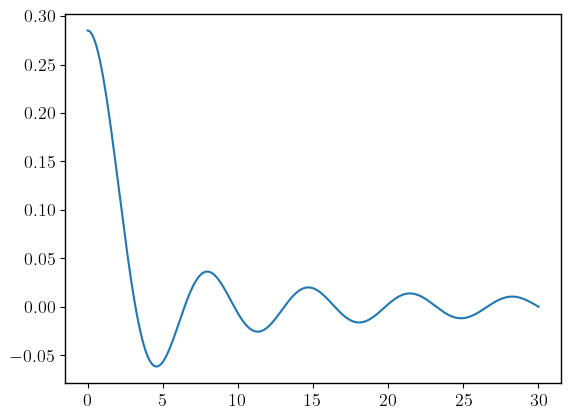

In [8]:
f0 = float(sol[0])
sol = solSys(systema, f0, u0=1, rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10)

plt.plot(sol.t, sol.y[0])

No parece funcionar como esperabamos, la razón es que podemos tener muchos nodos y eso cumplirán con la condición pedida. Veamos ahora un `comportamiento` típido de los solitones.

In [9]:
# Comportamiento típico
rmin, rmax = 0, 20

sig0val = [1.06, 1.0886370794188722, 1.09]  # valores para w

p0Prof = []
for f0 in sig0val:
    sol = solSys(systema, f0, u0=1, rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10)
    p0Prof.append([sol.t, sol.y[0]])

Text(0, 0.5, '$\\sigma$')

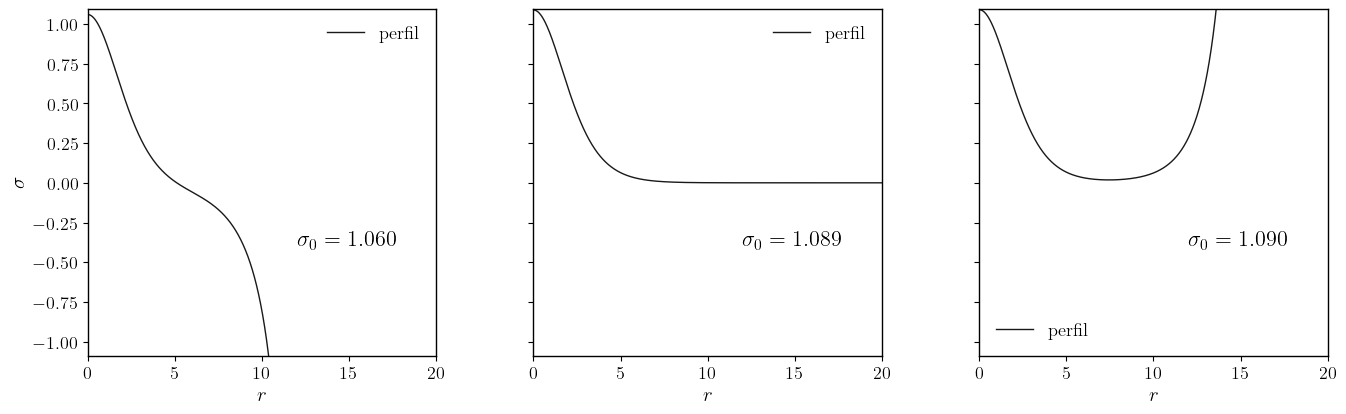

In [10]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

for i in range(3):
    ax[i].plot(p0Prof[i][0], p0Prof[i][1], c=col[0], lw=1, label=r'perfil')
    
    # comentar
    ax[i].set_xlim(0, rmax)
    ax[i].set_ylim(-sig0val[1], sig0val[1]+0.005)
    #ax[i].set_yticks([-p0, -p0/2, 0, p0/2, p0, p0+0.05])

    ax[i].text(x=12., y=-0.4, s=r'$\sigma_0 = %4.3f$'%sig0val[i])
    ax[i].legend(frameon=False, fontsize='small')
    ax[i].set_xlabel(r'$r$')

ax[0].set_ylabel(r'$\sigma$')

In [11]:
## Implementación shooting 2
def Freq_solve(systema, smin, smax, u0=1, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False):
    """
    Implementación de un algoritmo de shooting usando un método de bisección para encontrar el valor de la 
    frecuencia w0, dado una amplitud central p0.

    In:
    system -> sistema de ecuaciones
    smin, smax -> rango de valores en el que se buscará la amplitud central (recomendado añadir un check al código que verifique que smin<smax)
    rmax, rmin -> intervalo que se discretizará, por defecto rmin=0, rmax=1e03 (notar que lo q se busca es que alcance el límite en w0)
    met -> metodología usada por solve_ivp, las opciones son: 'DOP853', 'LSODA', 'RK45', por defecto está este último
    Rtol, Atol=1e-10 -> representan la tolerancia relativa y absoluta al usar solve_ivp, por defecto son Rtol=1e-09, Atol=1e-10
    limw -> representa la diferencia limítrofe que aceptaremos: abs((wmax-wmin)/2)<=limw Por defecto es limw=1e-14 
    info -> Imprime información complementaria, por defecto info=False

    Out:
    s0, rTemp  -> valor de la frecuencia encontrada y el radio máximo de la iteración
    """


    # IMPORTANT: it is not possible to find two event at same time
    # Events
    def Sig(r, yV): return yV[0]
    def dSig(r, yV): return yV[1]

    # establece las direcciones
    Sig.direction = -1  
    dSig.direction = 1
    # If direction is positive, event will only trigger when going from negative to positive, 
    # and vice versa if direction is negative. If 0, then either direction will trigger event. Implicitly 0 if not assigned.
    
    # establece que acción tomar
    Sig.terminal = True
    dSig.terminal = True

    while True:
        s0 = (smin+smax)/2  # bisección metodología
        
        sol = solSys(systema, s0, u0=u0, rmin=rmin, rmax=rmax, met=met, eventos=(Sig, dSig), # notar orden de los eventos
                     Rtol=Rtol, Atol=Atol)
        
        if info:
            plt.plot(sol.t, sol.y[0])
        
        if sol.t[-1]==rmax:  # caso en que alcanzó el rmax
            print('Found', s0)
            rTemp = sol.t[-1]
            break  
        elif sol.t_events[0].size > 0:  # caso en que hay algún evento tipo Sig, es decir s negativa
            #smax = s0
            smin = s0
            if info:
                print('Aumentando', 's0 = ', s0, 'smax = ', smax, 'smin ', smin)
        elif sol.t_events[1].size > 0:  # caso en que hay algún evento tipo dSig, es decir s' positiva
            #smin = s0
            smax = s0
            if info:
                print('Disminuyendo', 's0 = ', s0, 'smax = ', smax, 'smin ', smin)

        # checking the lim freq.
        if abs((smax-smin)/2)<=limw:
            print('Maxima precisión alcanzada', s0, 'radio', sol.t[-1])
            rTemp = sol.t[-1]
            break

    return s0, rTemp

In [13]:
# buscando la solución
smin, smax = 0.1, 3
s0, rTemp = Freq_solve(systema, smin, smax, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)

Maxima precisión alcanzada 1.0886370794188762 radio 22.404480896179237


(0.0, 22.404480896179237)

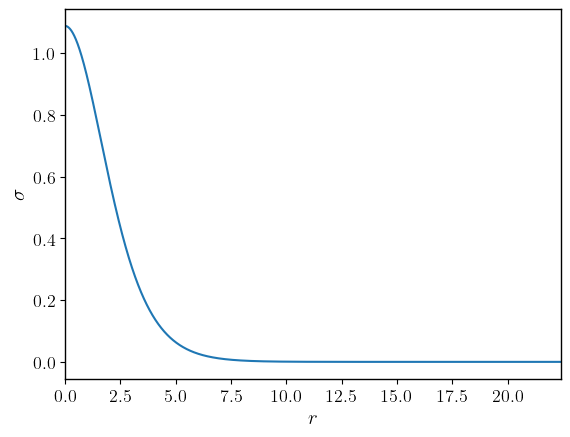

In [14]:
sol = solSys(systema, f0=s0, rmax=rTemp)
plt.plot(sol.t, sol.y[0])
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$r$')
plt.xlim(rmin, rTemp)

In [151]:
# Intentemos mejorar ahora con el shooting 1

[1.08863708]


(0.0, 40.0)

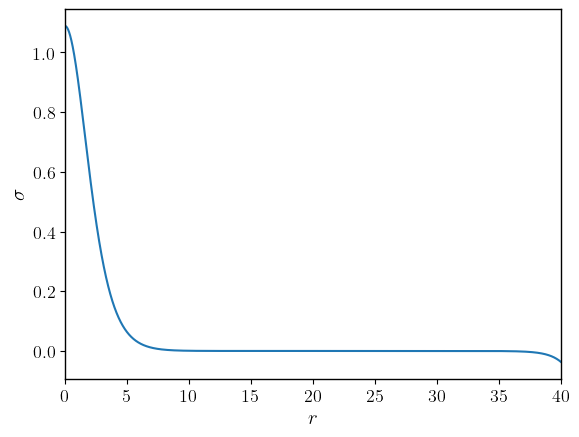

In [15]:
sf0 = s0
rmax = 40
sol = fshooting(systema, sf0, rmax=rmax, info=0)

print(sol)
sol = solSys(systema, sol[0], rmax=rmax)

plt.plot(sol.t, sol.y[0])
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$r$')
plt.xlim(rmin, rmax)

`Tarea:` Intentar generalizar el estudio para el caso de N nodos

In [16]:
# Posible respuesta
# SHOOTING PARA ENCONTRAR N nodos
def Freq_solveG(system, f_max, f_min, rmax_, rmin_, nodos, u0=1.0, df0=0, du0=0,
                met='RK45', Rtol=1e-09, Atol=1e-10):
    """
    Orden de las variables U = w, dw, phi, dphi
    """
    print('Finding a profile with ', nodos, 'nodes')
    # IMPORTANT: it is not possible to find two event at same time
    # Events
    def Sig(r, U): return U[0]
    def dSig(r, U): return U[1]
    Sig.direction = 0
    dSig.direction = 0
    while True:
        f0_ = (f_max+f_min)/2
        U0 = [f0_, df0, u0, du0]

        sol_ = solve_ivp(system, [rmin_, rmax_], U0, events=(Sig, dSig),
                         method=met,  rtol=Rtol, atol=Atol)
                          # 'DOP853''LSODA'

        if sol_.t_events[1].size == nodos+1 and sol_.t_events[0].size == nodos:
            print('Found', f0_)
            return f0_, rmax_, sol_.t_events[0]
        elif sol_.t_events[1].size > nodos+1:  # una vez por nodo
            if sol_.t_events[0].size > nodos:  # dos veces por nodo
                f_min = f0_
                rTemp_ = sol_.t_events[0][-1]
            else:  # si pasa por cero más veces que 2*nodos se aumenta la w, sino se disminuye
                f_max = f0_
                rTemp_ = sol_.t_events[1][-1]
        elif sol_.t_events[1].size <= nodos+1:
            if sol_.t_events[0].size > nodos:  # dos veces por nodo
                f_min = f0_
                rTemp_ = sol_.t_events[0][-1]
            else:
                f_max = f0_
                rTemp_ = sol_.t_events[1][-1]

        # checking the lim freq.
        if abs((f_max-f_min)/2) <= 1e-15:
            print('Maxima precisión alcanzada', f0_, 'radio', rTemp_)
            return f0_, rTemp_, sol_.t_events[0]

Finding a profile with  5 nodes
Maxima precisión alcanzada 0.6506137454338867 radio 71.60092741652954


(0.0, 71.60092741652954)

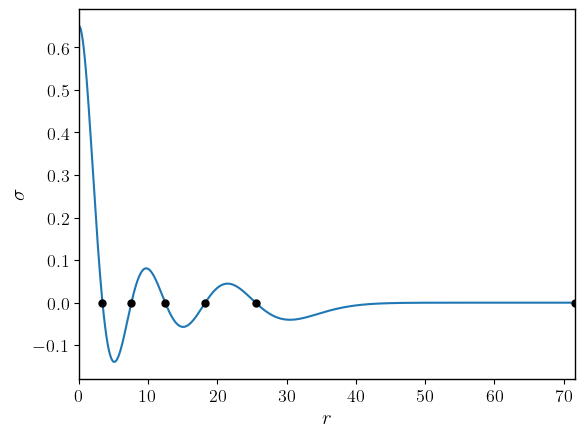

In [19]:
smin, smax = 0.1, 3
nodos = 5
rmin, rmax = 0, 100
s0, rmax, nodos = Freq_solveG(systema, smax, smin, rmax, rmin, nodos, u0=1.0, df0=0, du0=0,
                met='RK45', Rtol=1e-09, Atol=1e-10)


sol = solSys(systema, s0, rmax=rmax)
plt.plot(sol.t, sol.y[0])
plt.plot(nodos, [0]*len(nodos), 'ko', markersize=5)
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$r$')
plt.xlim(rmin, rmax)

#### Escalamiento

Les había comentado que gracias a la constante $\Lambda$ solo necesitabamos computar un perfil y a partir de este podemos construir toda la familia, veamos cómo hacerlo. Recordemos que:

\begin{align}
\bar{t}:=\frac{2m}{\Lambda} t, \quad \vec{x}:=\frac{2m}{\Lambda^{1/2}\hbar^{1/2}}\vec{x}, \quad \bar{U}:=\frac{\Lambda}{2\hbar}U, \quad \bar{\Psi}:=\left(\frac{\pi G\Lambda^2}{2m}\right)^{1/2}\Psi,
\end{align}

Validemos primero que el escalamiento es cierto.

In [20]:
# buscando la solución con u0=1
smin, smax = 0.1, 3
s0, rTemp0 = Freq_solve(systema, smin, smax, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)


# buscando la solución con u0=0.5
smin, smax = 0.1, 3
s1, rTemp1 = Freq_solve(systema, smin, smax, u0=0.5, rmin=0, rmax=1e03, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)

Maxima precisión alcanzada 1.0886370794188762 radio 22.404480896179237
Maxima precisión alcanzada 0.5443185397054445 radio 31.00620124024805


In [21]:
sol0 = solSys(systema, f0=s0, rmax=rTemp0)
sol1 = solSys(systema, f0=s1, u0=0.5, rmax=rTemp1)

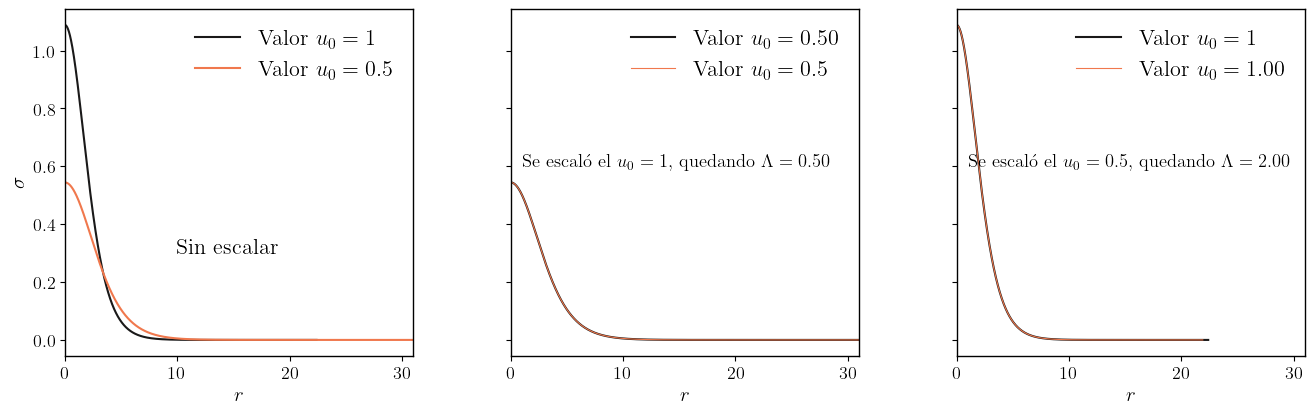

In [22]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sol0.t, sol0.y[0], c=col[0], label=r'Valor $u_0=1$')
ax[0].plot(sol1.t, sol1.y[0], c=col[1], label=r'Valor $u_0=0.5$')
ax[0].text(x=10, y=0.3, s=r'Sin escalar')
      
#### escalando al u0=1
Lambda = sol1.y[0][0]/sol0.y[0][0]

ax[1].plot(sol0.t/np.sqrt(Lambda), sol0.y[0]*Lambda, c=col[0], label=r'Valor $u_0=%3.2f$'%(1*Lambda))
ax[1].plot(sol1.t, sol1.y[0], c=col[1], label=r'Valor $u_0=0.5$', lw=0.8)
ax[1].text(x=1, y=0.6, s=r'Se escaló el $u_0=1$, quedando $\Lambda=%3.2f$'%Lambda, fontsize='small')

#### escalando al u0=0.5
Lambda = sol0.y[0][0]/sol1.y[0][0]

ax[2].plot(sol0.t, sol0.y[0], c=col[0], label=r'Valor $u_0=1$')
ax[2].plot(sol1.t/np.sqrt(Lambda), sol1.y[0]*Lambda, c=col[1], label=r'Valor $u_0=%3.2f$'%(0.5*Lambda), lw=0.8)
ax[2].text(x=1, y=0.6, s=r'Se escaló el $u_0=0.5$, quedando $\Lambda=%3.2f$'%Lambda, fontsize='small')



############
ax[0].set_ylabel(r'$\sigma$')
for i in ax:
      i.set_xlabel(r'$r$')
      i.set_xlim(0, rTemp1)
      i.legend(frameon=False)

### Autovalor de la energía y potencial gravitatorio

Bueno, ya son expertos en obtener las soluciones numéricas, sin embargo, también es importante representar el potencial físico y obtener el autovalor de la energía.

`¿Cómo lo calcularían?`

Pues pudieramos mediante el cambio de variable que introducimos:

$$u(r) = E-U(r)$$

Como se estableció, nuestros solitones son localizados y de energía finita, por tanto tenemos que $\lim\limits_{r\to\infty}U(r)=0$, lo que nos lleva a que:
$$ E = \lim\limits_{r\to\infty}u(r) $$

En otras palabras, **en principio** tendremos que 
$$E=u(r_\star)$$

donde $r_\star$ es nuestro máximo valor del radio de integración. `¿Será cierto?`, veamos

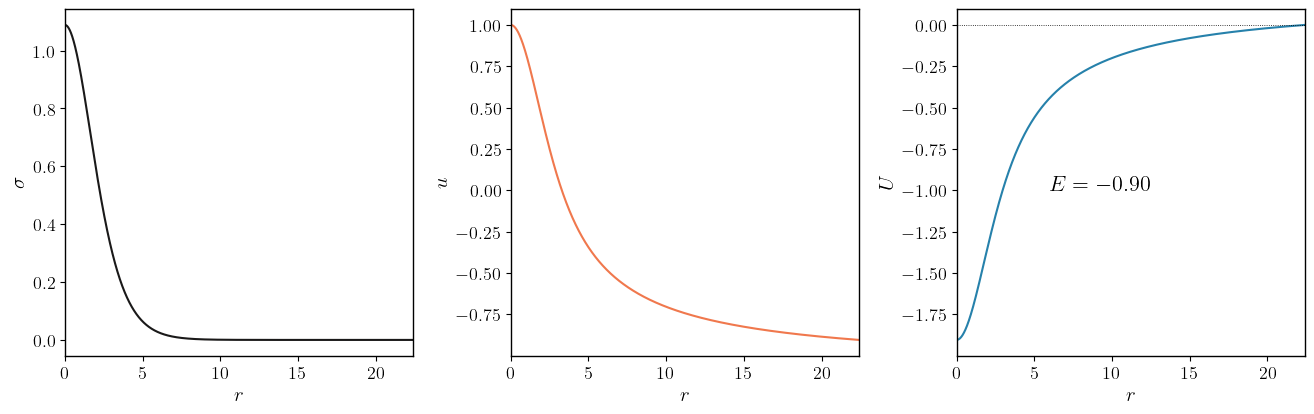

In [23]:
s0, rmax =  1.0886370794188762, 22.404480896179237
sol0 = solSys(systema, f0=s0, rmax=rmax)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sol0.t, sol0.y[0], c=col[0])
ax[1].plot(sol0.t, sol0.y[2], c=col[1])

# Autovalor Energia
En0 = sol0.y[2][-1]
U = En0 - sol0.y[2]
ax[2].plot(sol0.t, U, c=col[2])
ax[2].hlines(y=0, xmin=0, xmax=rmax, ls=':', lw=0.6, color='k')
ax[2].text(x=6, y=-1, s=r'$E=%3.2f$'%En0)

############
ax[0].set_ylabel(r'$\sigma$')
ax[1].set_ylabel(r'$u$')
ax[2].set_ylabel(r'$U$')
for i in ax:
      i.set_xlabel(r'$r$')
      i.set_xlim(0, rmax)

Pues parece que ya todo está resuelto.... ¿? 

Veamos una manera alterna de calcular la energía:
\begin{align}
E = u_{0}-\int_{0}^{\infty} r|\sigma(r)|^2 dr.
\end{align}

A continuación discutamos a grandes rásgos como se llega a esta ecuación. `Tarea:` Hacer los cálculos.

Partiendo del sistema 
\begin{align}
\triangle\sigma& = - u \sigma,\\
\triangle u &= -\sigma^2,
\end{align}

si integramos dos veces con respecto a $r$ usando la integración por parte y teniendo presente las condiciones de frontera, se llega a:
\begin{align}
\sigma(r)&=\sigma_0+\int_{0}^{r}u^{(0)}(x)\sigma(x) \left[\frac{x}{r}-1\right]x dx,\\
u(r)&=u_0+\int_{0}^{r}|\sigma(x)|^2\left(\frac{x}{r}-1\right)x dx.
\end{align}

Ahora, si diferenciamos con respecto a $r$ la expresión para $u$ llegamos a:
\begin{equation}
    \frac{du^{(0)}(r)}{dr}=-\frac{1}{r^2}\int_{0}^{r}|\sigma(x)|^2 x^{2} dx,
\end{equation}
lo que implica que $u$ es monotonamente decreciente, y por tanto el potencial gravitatorio $U$ es monotonaemente creciente hasta cero (como es esperado). Por otro lado, puesto que $\sigma(x)$ es exponencialmente decreciente para $x\to \infty$, podemos expandir $u$ en potencias de $r^{-1}$,
\begin{equation}
u^{(0)}(r) = E +\frac{M}{r}+O(r^{-2}),
\end{equation}
donde las constantes $E$ y $M$ vienen dadas por:
\begin{align}
E_\ell &=u_{0}-\int_{0}^{\infty} x|\sigma(x)|^2 dx,\\
M &=\int_{0}^{\infty} x^2|\sigma(x)|^2 dx.
\end{align}
Notese que $M$ es la integral sobre la densidad de masa $|\sigma_\ell^{(0)}(r)|^2$ multiplicada por $r^2$; es decir, representa la masa total de la configuración en unidades de código.

En resumen, las expresiones anteriores nos brindan un método alternativo para computar $E$ dado $u_0$ y el perfil radial $\sigma(r)$. Aunque es cierto que la integración no la realizamos en el rango $0 < x < \infty$ (puesto que $\sigma$ es hasta un radio finito $r_{\text{max}}$) el hecho de que $\sigma$ decaiga de forma exponencial, implica que la contribución omitida, dada por el intervalo $r_{\text{max}}<x<\infty$ no es relativamente significante.


In [24]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [25]:
# ENERGIA
def energ(r, sig, V0):
    sigF = interp1d(r, sig, kind='quadratic')
    Af = lambda r: r*sigF(r)**2
    Bf = lambda r: r**2*sigF(r)**2

    rmin = r[0]
    rfin = r[-1]

    En = V0 - quad(Af, rmin, rfin)[0]
    M = quad(Bf, rmin, rfin)[0]
    
    return En, M

In [26]:
r, sig, V0 = sol0.t, sol0.y[0], 1
En, M = energ(r, sig, V0)
print('El autovalor de la energía es por la primera via es', En0, ' por la segunda es ', En) 

El autovalor de la energía es por la primera via es -0.9042144258590245  por la segunda es  -1.065731278890306


Notemos como se parecen, pero ¿cuál es el correcto?

Veamos algo:

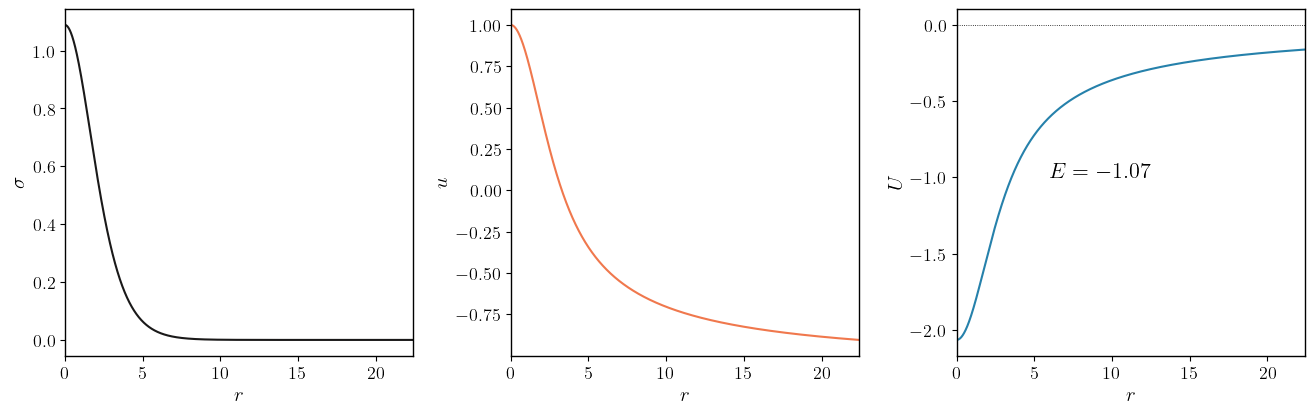

In [27]:
s0, rmax =  1.0886370794188762, 22.404480896179237
sol0 = solSys(systema, f0=s0, rmax=rmax)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sol0.t, sol0.y[0], c=col[0])
ax[1].plot(sol0.t, sol0.y[2], c=col[1])

# Autovalor Energia
U = En - sol0.y[2]  # usemos el valor computado por la integral
ax[2].plot(sol0.t, U, c=col[2])
ax[2].hlines(y=0, xmin=0, xmax=rmax, ls=':', lw=0.6, color='k')
ax[2].text(x=6, y=-1, s=r'$E=%3.2f$'%En)

############
ax[0].set_ylabel(r'$\sigma$')
ax[1].set_ylabel(r'$u$')
ax[2].set_ylabel(r'$U$')
for i in ax:
      i.set_xlabel(r'$r$')
      i.set_xlim(0, rmax)

Si usamos el valor de la integral, lo que notamos que pareciera que el potencial gravitatorio aún no es cero, y puede que tenga sentido, pues `¿por qué ha de ser $r=25$ el infinito?`.

Puede argumentarse de que tampoco las integrales se hicieron hasta el infinito, y es cierto, sin embargo, una integral es la contribución de "toda" la función $\sigma$, y sabemos que ya para $r=25$ esta es muy muy pequeña y las contribuciones que despreciamos por no llegar al infinito son mucho menores que la primera parte. Pero tampoco es una respuesta final este argumento.

Veamos otro análisis.

`Comportamiento asintótico`

Podemos analizar el sistema y llegaríamos a que para valores de $r$ lo suficientemente grandes, las soluciones han de tener este comportamiento:

\begin{align}
\sigma(r)\approx \frac{C_1}{r}e^{-\sqrt{|E|}r},\\
u(r)\approx E+\frac{M}{r}.
\end{align}

Implementemos este comportamiento asintótico y extendamos nuestras soluciones numéricas y veamos si las mismas convergen al valor de $E$ predicho por la integral o por la otra vía

In [28]:
# Parámetros
def parametrosS(r, S):
    yr1, yr2 = S[-2], S[-1]
    r1, r2 = r[-2], r[-1]

    k = np.real(np.log(np.abs(yr1*r1/(yr2*(r2)))))
    s = np.exp(-k*r1)/r1
    Ap = yr1/s
    return Ap, k

# funciones asíntóticas
def sigm(r, Ap, k):
    y = Ap*np.exp(-k*r)/r
    dy = -(Ap*np.exp(-k*r)*(1+k*r))/r**2
    return y, dy

def Up(r, A, B):
    y = A+B/r
    dy = -B/r**2
    return y, dy

def extend(rD, sD, dsD, uD, duD, Ext, Np=1000):
    """ 
    """

    rad = np.linspace(rD[-1], rD[-1]+Ext, Np)

    # calculando parámetros
    Ap, k = parametrosS(rD, sD)
    En, M = energ(rD, sD, uD[0])

    # uniendo datos
    sExt, dsExt = sigm(rad, Ap, k)
    uExt, duExt = Up(rad, En, M)

    rDnew = np.concatenate((rD[:-1], rad), axis=None)
    sDnew = np.concatenate((sD[:-1], sExt), axis=None)
    dsDnew = np.concatenate((dsD[:-1], dsExt), axis=None)
    uDnew = np.concatenate((uD[:-1], uExt), axis=None)
    duDnew = np.concatenate((duD[:-1], duExt), axis=None)

    return rDnew, sDnew, dsDnew, uDnew, duDnew

In [29]:
s0, rmax =  1.0886370794188762, 22.404480896179237
sol0 = solSys(systema, f0=s0, rmax=rmax)


rD, sD, dsD, uD, duD = sol0.t, sol0.y[0], sol0.y[1], sol0.y[2], sol0.y[3]

Ext = 7000
Np = 4800
rDnew, sDnew, dsDnew, uDnew, duDnew = extend(rD[:-160], sD[:-160], dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

In [30]:
# computando la energía
# sin extender
r, sig, V0 = sol0.t, sol0.y[0], 1
En0 = sol0.y[2][-1]
En, M = energ(r, sig, V0)
print('El autovalor de la energía es por la primera via es', En0, ' por la segunda es ', En) 

# extendido
En, M = energ(rDnew, sDnew, V0)
En0 = uDnew[-1]
print('El autovalor de la energía es por la primera via es', En0, ' por la segunda es ', En) 

El autovalor de la energía es por la primera via es -0.9042144258590245  por la segunda es  -1.065731278890306
El autovalor de la energía es por la primera via es -1.0652159176658311  por la segunda es  -1.0657312784973305


¡¡Notar como todo ahora si ajusta!!

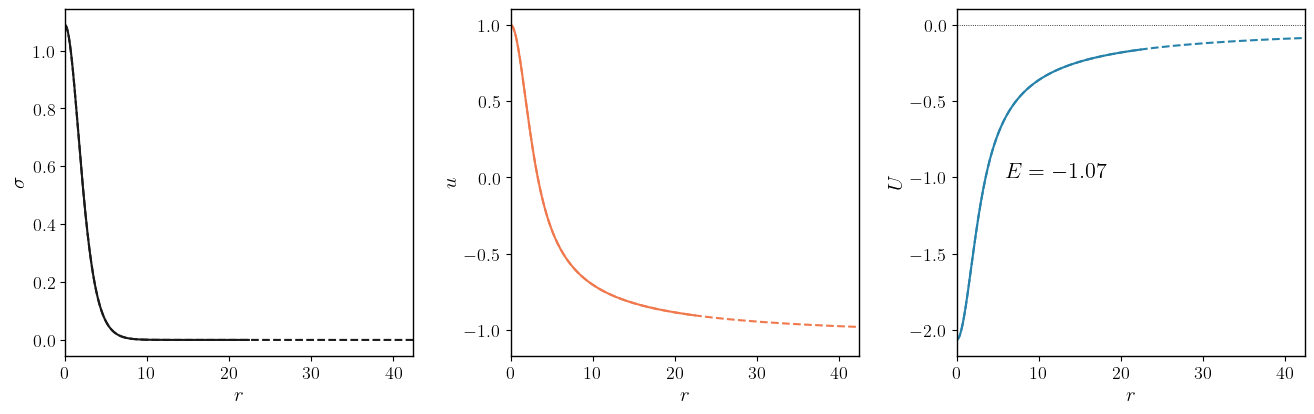

In [33]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

# graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sol0.t, sol0.y[0], c=col[0])
ax[0].plot(rDnew, sDnew, c=col[0], ls='--')

ax[1].plot(sol0.t, sol0.y[2], c=col[1])
ax[1].plot(rDnew, uDnew, c=col[1], ls='--')

# Autovalor Energia
U = En - sol0.y[2]  # usemos el valor computado por la integral
Uex = En - uDnew
ax[2].plot(sol0.t, U, c=col[2])
ax[2].plot(rDnew, Uex, c=col[2], ls='--')

ax[2].hlines(y=0, xmin=0, xmax=rmax+20, ls=':', lw=0.6, color='k')
ax[2].text(x=6, y=-1, s=r'$E=%3.2f$'%En)

############
ax[0].set_ylabel(r'$\sigma$')
ax[1].set_ylabel(r'$u$')
ax[2].set_ylabel(r'$U$')
for i in ax:
      i.set_xlabel(r'$r$')
      i.set_xlim(0, rmax+20)

#### Estabilidad lineal